# Try the predict function

In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
from elle_ebene.predict import Predict
from elle_ebene.simple_preprocessing import get_images
from elle_ebene.params import RESIZING_DIM
from elle_ebene.baseline_model import initialize_model
import numpy as np

In [30]:
from  PIL import Image
import os
import matplotlib.pyplot as plt
from io import BytesIO

In [31]:
abs_path = "/home/aymeric/code/Aymeric-B/elle_ebene/raw_data"
type3_imgs = get_images("Type 3", path=abs_path)
type4_imgs = get_images("Type 4", path=abs_path)

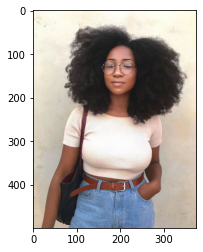

In [32]:
img = type4_imgs[0]
plt.imshow(img)

In [33]:
predictor = Predict()

In [34]:
predictor.model_init(path = "../../model_weights/baseline/weights")

In [35]:
pred3 = predictor.predict(type3_imgs)
pred4 = predictor.predict(type4_imgs)


In [36]:
pred3

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0])

In [39]:
pred4

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1])

In [37]:
pred3_alone = predictor.predict(type3_imgs[0]) #test vérif 

In [40]:
np.mean(pred3)

0.178743961352657

In [41]:
np.mean(pred4)

0.8029556650246306

In [43]:
type3_labels = np.full((len(pred3),),0)
type4_labels = np.full((len(pred4),),1)

In [44]:
from sklearn.metrics import confusion_matrix

In [46]:
concat_pred = np.concatenate((pred3, pred4))
concat_y = np.concatenate((type3_labels, type4_labels))

In [48]:
cm = confusion_matrix(concat_y,concat_pred)
cm

array([[170,  37],
       [ 40, 163]])

In [49]:
import seaborn as sns

Text(0.5, 24.0, 'Predicted label')

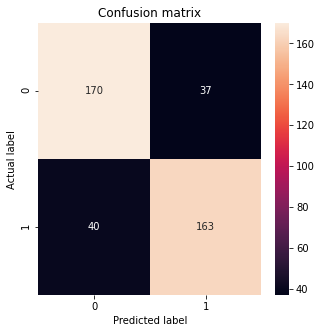

In [50]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [54]:
pred4 == 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
        True, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False,  True, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False,

In [71]:
from elle_ebene.simple_preprocessing import to_numpy_rgb, squared_imgs, resize_img

In [72]:
type3_numpy_imgs = np.asarray(squared_imgs(to_numpy_rgb([resize_img(img, RESIZING_DIM) for img in type3_imgs])))
type4_numpy_imgs = np.asarray(squared_imgs(to_numpy_rgb([resize_img(img, RESIZING_DIM) for img in type4_imgs])))

In [74]:
wrong_4 = type4_numpy_imgs[pred4 == 0]
wrong_3 = type3_numpy_imgs[pred3  == 1]

In [75]:
wrong_3.shape

(37, 500, 500, 3)

In [77]:
wrong_4.shape

(40, 500, 500, 3)

IndexError: index 37 is out of bounds for axis 0 with size 37

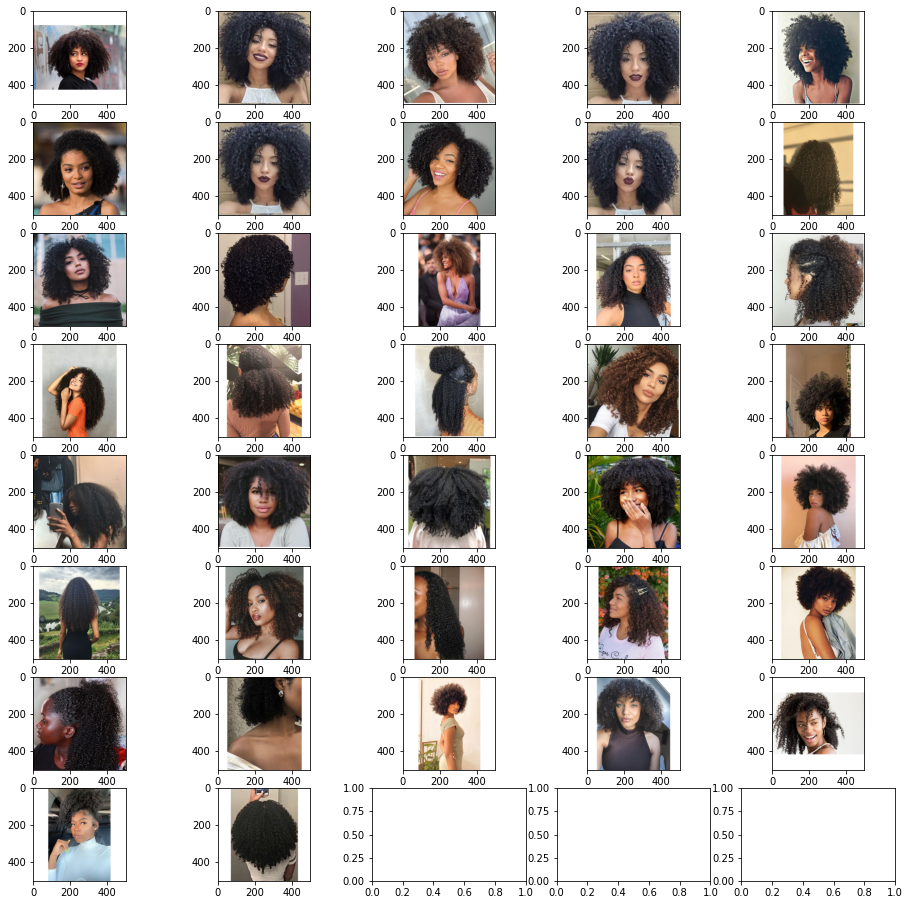

In [83]:
fig, axs = plt.subplots(nrows=8, ncols=5, figsize = (16,16))
for i in range(8):    
    for j in range(5):
        axs[i,j].imshow(wrong_3[i*5+j])
plt.show()

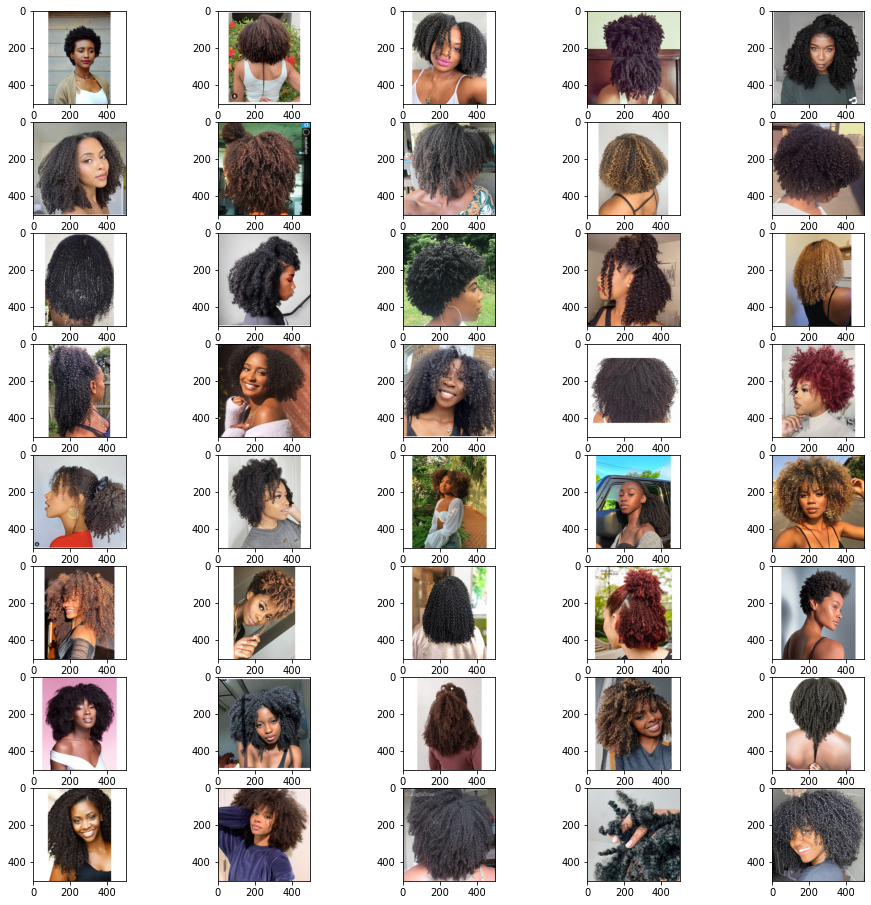

In [84]:
fig, axs = plt.subplots(nrows=8, ncols=5, figsize = (16,16))
for i in range(8):    
    for j in range(5):
        axs[i,j].imshow(wrong_4[i*5+j])
plt.show()